In [2]:
import pandas as pd
import numpy as np
# Importing and Exporting Data
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [60]:
df['Height'].mean()

np.float64(169.944)

In [61]:
df['Height'].median()

np.float64(170.5)

In [62]:
df['Height'].mode()

0    188
Name: Height, dtype: int64

In [63]:
# Hitung kuartil pertama (Q1)
q1 = df['Height'].quantile(0.25)
print("Q1 : ", q1)
# Hitung kuartil ketiga (Q3)
q3 = df['Height'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 - q1
print("IQR : ", iqr)

Q1 :  156.0
Q3 :  184.0
IQR :  28.0


In [64]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


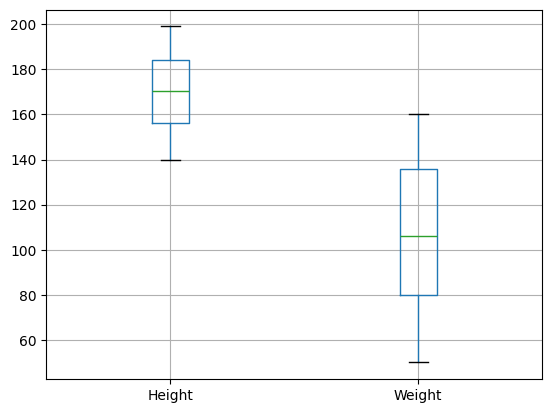

In [65]:
import matplotlib.pyplot as plt

df.boxplot(column=['Height','Weight'])
plt.show()

In [66]:
outlier_data = {
    'Gender': ["Male", "Female", "Female", "Male"],
    'Height': [51, 155, 45, 160],
    'Weight': [33, 320, 30, 335],
    'Index': [2, 5, 2, 5]
}

outlier_df = pd.DataFrame(outlier_data)

df = pd.concat([df, outlier_df], ignore_index=True)
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
499,Male,173,131,5
500,Male,51,33,2
501,Female,155,320,5
502,Female,45,30,2


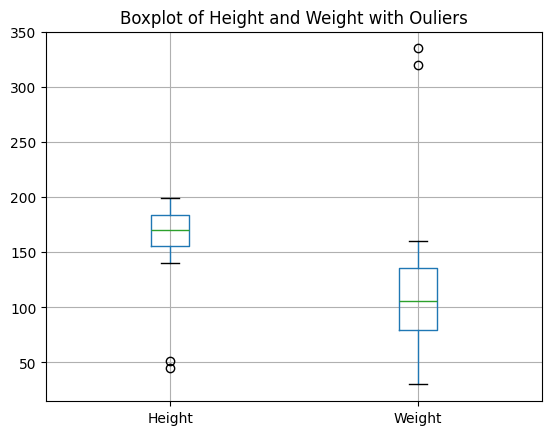

In [67]:
df.boxplot(column=['Height','Weight'])
plt.title('Boxplot of Height and Weight with Outliers')
plt.show()

In [68]:
# Hitung kuartil pertama (Q1)
q1 = df['Height'].quantile(0.25)
print("Q1 : ", q1)
# Hitung kuartil ketiga (Q3)
q3 = df['Height'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 - q1
# Hitung batas bawah (Lower Bound) dan batas atas (upper Bound) untuk Outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# temukan outlier dalam DaraFrame
outliers = df[(df['Height'] < lower_bound) | (df['Height'] > upper_bound)]

print("Outlier Height: ")
print(outliers)
# mencari data outlier dalam kolom

Q1 :  156.0
Q3 :  184.0
Outlier Height: 
     Gender  Height  Weight  Index
500    Male      51      33      2
502  Female      45      30      2
